In [36]:
# Importeren benodigde libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path, getcwd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [37]:
# Import data
root_dir = path.join(getcwd(), 'Datasets')
data_per_dag =  pd.read_csv(path.join(root_dir, 'data_per_dag.csv'), sep=',')
data_per_leeftijd =  pd.read_csv(path.join(root_dir, 'data_per_leeftijd.csv'), sep=',')

In [38]:
X = data_per_dag['Infection'].to_numpy().reshape(-1, 1)
y = data_per_dag['Opname IC totaal']

# Split 20% off to training set, random state = 42 because its a common choice
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Instantiate a Gaussian Process model
kernel = 1.0 * RBF(length_scale=1, length_scale_bounds=(1e-6, 1e5)) + 1.0 * WhiteKernel(noise_level=1)
gp = GaussianProcessRegressor(kernel=kernel, random_state=42, normalize_y=True, n_restarts_optimizer=10)

In [40]:
# Fitmodel
gp.fit(x_train, y_train)

# Predict test set
y_pred, y_stdev = gp.predict(x_test, return_std=True)

# Calculate statistics
def show_stats(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    print("Regression statistics:")
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
    print("Coefficient of determination: %.2f" % r2)
show_stats(y_test, y_pred)

Regression statistics:
Mean squared error: 330.65
Root mean squared error: 18.18
Mean absolute error: 11.18
Coefficient of determination: 0.44


Text(0.5, 1.0, '0.612**2 * RBF(length_scale=276) + 1.47**2 * WhiteKernel(noise_level=0.231)')

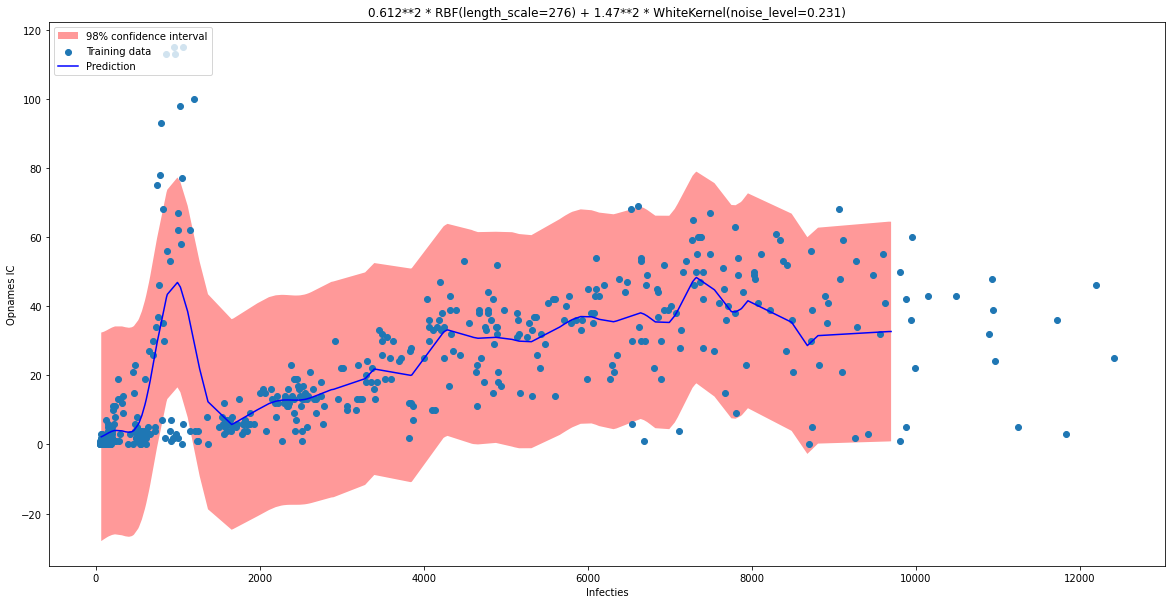

In [41]:
# sort x and y by x
def sort_x(x_test, y_pred, y_stdev):
    x_test_1d = x_test.ravel()
    y_pred_1d = y_pred.ravel()
    
    argsort_x_test = np.argsort(x_test_1d, axis=0)
    return (x_test_1d[argsort_x_test],
    y_pred_1d[argsort_x_test],
    y_stdev[argsort_x_test])

x_test_sort, y_pred_sort, y_stdev_sort = sort_x(x_test, y_pred, y_stdev)

plt.figure(figsize=(20,10))

# confidence interval
def fill_confidence_interval(x_test, y_pred, y_stdev):
    plt.gca().fill_between(
        x_test,
        y_pred - y_stdev * 1.96, y_pred + y_stdev * 1.96,
        alpha=0.4,
        fc="r",
        ec="None",
        label="98% confidence interval"
    )

fill_confidence_interval(x_test_sort, y_pred_sort, y_stdev_sort)

plt.scatter(x_train, y_train, color='tab:blue', label='Training data')
plt.plot(x_test_sort, y_pred_sort, color='blue', label='Prediction')
plt.xlabel("Infecties")
plt.ylabel("Opnames IC")
plt.legend(loc="upper left")
plt.title(gp.kernel_)

Regression statistics:
Mean squared error: 98.46
Root mean squared error: 9.92
Mean absolute error: 6.47
Coefficient of determination: 0.83


Text(0.5, 1.0, '2.22**2 * RBF(length_scale=197) + 108**2 * WhiteKernel(noise_level=1.18e-05)')

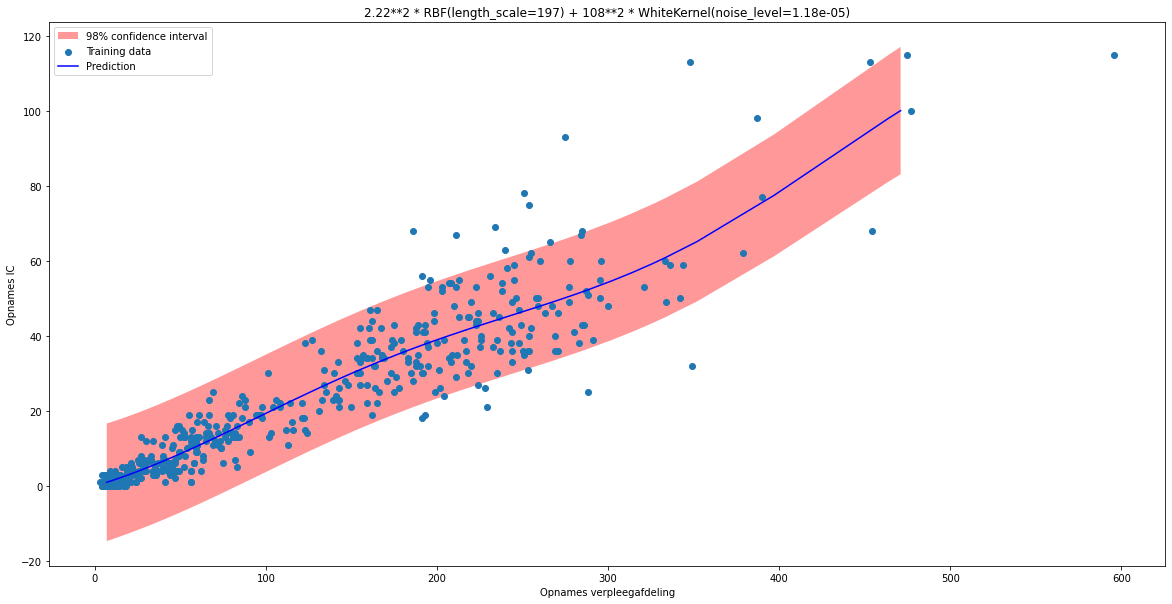

In [42]:
X_2 = data_per_dag['Opname verpleegafdeling totaal'].to_numpy().reshape(-1, 1)

# Split 20% off to training set, random state = 42 because its a common choice
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=42)

# Nieuw model
gp_2 = GaussianProcessRegressor(kernel=kernel, random_state=42, normalize_y=True, n_restarts_optimizer=10)

# Fit model
gp_2.fit(x_train_2, y_train_2)

# Predict test set
y_pred_2, y_stdev_2 = gp_2.predict(x_test_2, return_std=True)
show_stats(y_test_2, y_pred_2)

x_test_sort_2, y_pred_sort_2, y_stdev_sort_2 = sort_x(x_test_2, y_pred_2, y_stdev_2)

plt.figure(figsize=(20,10))

fill_confidence_interval(x_test_sort_2, y_pred_sort_2, y_stdev_sort_2)

plt.scatter(x_train_2, y_train_2, color='tab:blue', label='Training data')
plt.plot(x_test_sort_2, y_pred_sort_2, color='blue', label='Prediction')
plt.xlabel("Opnames verpleegafdeling")
plt.ylabel("Opnames IC")
plt.legend(loc="upper left")
plt.title(gp_2.kernel_)


In [43]:
X_3 = data_per_dag[['Opname verpleegafdeling totaal', 'Infection']].to_numpy()

# Split 20% off to training set, random state = 42 because its a common choice
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.2, random_state=42)


# Nieuw model
gp_3 = GaussianProcessRegressor(kernel=kernel, random_state=42, normalize_y=True, n_restarts_optimizer=10)

# Fit model
gp_3.fit(x_train_3, y_train_3)

# Predict test set
y_pred_3, y_stdev_3 = gp_3.predict(x_test_3, return_std=True)
show_stats(y_test_3, y_pred_3)

Regression statistics:
Mean squared error: 63.82
Root mean squared error: 7.99
Mean absolute error: 5.60
Coefficient of determination: 0.89


(0.0, 400.0)

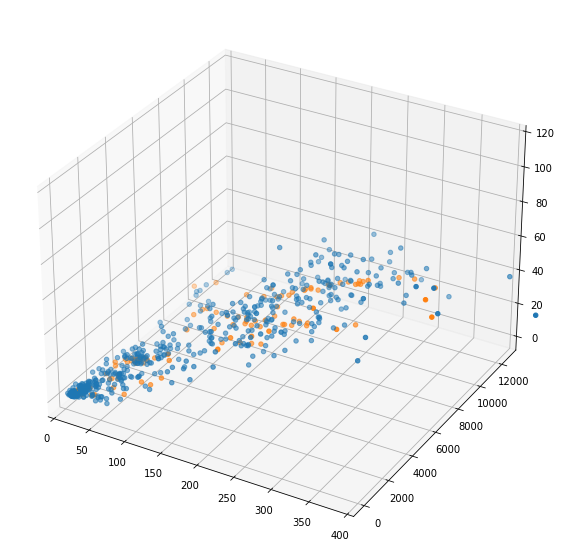

In [44]:
sort_1 = x_test_3[:,0].argsort()

x_test_3 = x_test_3[sort_1]
y_pred_3 = y_pred_3[sort_1]

sort_2 = x_test_3[:,1].argsort()

x_test_3 = x_test_3[sort_2]
y_pred_3 = y_pred_3[sort_2]

plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

ax.scatter3D(x_train_3[:, 0], x_train_3[:, 1], y_train_3, 'gray')
ax.scatter3D(x_test_3[:, 0], x_test_3[:, 1], y_pred_3)

ax.set_xlim3d(0, 400)

In [45]:
# Label encode the age groups
labels = data_per_leeftijd['Age_group'].unique()
le = LabelEncoder()
le.fit(labels)
data_per_leeftijd['Age_group_labels'] = le.transform(data_per_leeftijd['Age_group'].values)

# Create dummy variables for age groups
enc = OneHotEncoder()
# run encoder
dummy_booleans = enc.fit_transform(data_per_leeftijd[['Age_group_labels']])
# reverse transform boolean labels to original text values for use as column names
column_names = le.inverse_transform(enc.categories_[0])
# Put output in dataframe and restore the original index values
one_hot_enc = pd.DataFrame(dummy_booleans.toarray(), columns=column_names, index=data_per_leeftijd.index)

y_2 = data_per_leeftijd['IC_admission']
X_4 = data_per_leeftijd[['Hospital_admission', 'Infection']].join(one_hot_enc).to_numpy()

# Split 20% off to training set, random state = 42 because its a common choice
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_2, test_size=0.2, random_state=42)

# Nieuw model
gp_4 = GaussianProcessRegressor(kernel=kernel, random_state=42, normalize_y=True, n_restarts_optimizer=10)

# Fit model
gp_4.fit(x_train_4, y_train_4)

# Predict test set
y_pred_4, y_stdev_4 = gp_4.predict(x_test_4, return_std=True)
show_stats(y_test_4, y_pred_4)

Regression statistics:
Mean squared error: 256.54
Root mean squared error: 16.02
Mean absolute error: 7.30
Coefficient of determination: 0.64
